In [1]:
# спочатку song_listened
import pandas as pd

path_to_train = './data/train.csv'

cols = ['context_type', 'media_duration', 'user_gender', 'user_age']

train = pd.read_csv(path_to_train, encoding='utf-8', usecols=cols+['listen_type', 'ts_listen', 'user_id', 'is_listened'])
train = train.sort_values(by=['ts_listen'], axis=0)

train.head()

,ts_listen,context_type,media_duration,user_gender,user_id,user_age,is_listened
5010516,1,0,454,0,4606,23,0
1309460,2,0,213,0,7557,28,1
824607,2,0,235,0,5034,19,1
5321927,2,0,467,0,13875,28,0
5010515,3,0,388,0,4606,23,0


In [2]:
song_listened = pd.read_csv("./data/features/C++ Output/song_listened.txt", 
                            encoding='utf-8', header=None, names=['song_listened'])

song_listened.index = train.index

train = pd.concat([train, song_listened], axis=1)
train.tail(10)

,ts_listen,context_type,media_duration,user_gender,user_id,user_age,is_listened,song_listened
1399590,1480635537,1,190,0,11367,22,1,0.524404
3515219,1480635540,1,196,1,8478,26,1,0.721623
1794123,1480635727,1,209,0,11367,22,1,0.646143
6518287,1480635742,0,276,0,17033,21,0,0.732686
235718,1480635754,0,252,0,17033,21,0,0.779660
5117944,1480635762,0,191,0,17033,21,0,0.710092
7284926,1480635790,0,182,0,17033,21,0,0.801380
1877708,1480635799,0,265,0,17033,21,0,0.690636
6190161,1480635812,0,176,0,17033,21,1,0.763809
1093339,1480635845,0,208,0,17033,21,0,-1.000000


In [3]:
# 2 - song_listened_test
path_to_test = './data/test.csv'

test = pd.read_csv(path_to_test, encoding='utf-8', usecols=cols+['ts_listen', 'user_id'])
test = test.sort_values(by=['ts_listen'], axis=0)

song_listened_test = pd.read_csv("./data/features/C++ Output/song_listened_test.txt", 
                            encoding='utf-8', header=None, names=['song_listened'])

song_listened_test.index = test.index

test = pd.concat([test, song_listened_test], axis=1)
test.head(10)

,ts_listen,context_type,media_duration,user_gender,user_id,user_age,song_listened
4089,1473680999,1,237,1,19745,27,0.772727
7094,1477679084,1,329,0,19862,27,0.848740
18287,1477763823,1,266,0,19746,23,0.637058
19589,1477829315,1,195,0,19880,25,0.481928
9995,1477929530,1,237,1,19370,19,0.764089
18127,1477931549,1,176,0,19690,26,0.618881
9127,1477938653,5,324,1,19792,26,0.782609
5255,1477945580,1,189,1,13470,27,0.706601
13976,1477945654,1,112,0,9509,21,0.000000
13927,1477959138,1,203,0,19300,21,0.585034


In [4]:
train = train.sort_index()
test = test.sort_index()
train.head()

,ts_listen,context_type,media_duration,user_gender,user_id,user_age,is_listened,song_listened
0,1480597215,12,223,0,9241,29,0,-1.0
1,1480544735,0,171,0,16547,30,1,-1.0
2,1479563953,1,149,1,7665,29,1,-1.0
3,1480152098,0,240,1,1580,30,0,-1.0
4,1478368974,0,150,1,1812,24,1,1.0


In [5]:
# 3 - cumsum
path_to_test_cumsum = './data/features/cumsum.test.csv'
path_to_train_cumsum = './data/features/cumsum.train.csv'

train_cumsum = pd.read_csv(path_to_train_cumsum, encoding='utf-8')
train = pd.concat([train, train_cumsum], axis=1)
train.head()

,ts_listen,context_type,media_duration,user_gender,user_id,user_age,is_listened,song_listened,cumsum_listen_type,cumsum_listen_type_1,cumsum_is_listened,cumsum_is_listened_1
0,1480597215,12,223,0,9241,29,0,-1.0,5.0,0.0,3.0,0.0
1,1480544735,0,171,0,16547,30,1,-1.0,4.0,0.0,1.0,1.0
2,1479563953,1,149,1,7665,29,1,-1.0,2.0,0.0,5.0,5.0
3,1480152098,0,240,1,1580,30,0,-1.0,5.0,0.0,1.0,0.0
4,1478368974,0,150,1,1812,24,1,1.0,5.0,0.0,5.0,5.0


In [6]:
test_cumsum = pd.read_csv(path_to_test_cumsum, encoding='utf-8')
test = pd.concat([test, test_cumsum], axis=1)

In [7]:
test.head()

,ts_listen,context_type,media_duration,user_gender,user_id,user_age,song_listened,cumsum_listen_type,cumsum_listen_type_1,cumsum_is_listened,cumsum_is_listened_1
0,1478104371,1,542,0,17698,30,0.666667,5.0,5.0,5.0,5.0
1,1479317140,1,307,0,10525,28,0.671202,5.0,0.0,1.0,0.0
2,1479546361,1,307,0,8716,27,0.671202,5.0,5.0,5.0,0.0
3,1478457729,1,265,0,5443,30,0.630682,5.0,0.0,1.0,0.0
4,1480448560,1,356,0,7600,29,0.733333,5.0,5.0,5.0,5.0


In [8]:
# 4 - listened before
path_to_test_prev_is_listened = './data/features/prev_is_listened.test.csv'
path_to_train_prev_is_listened = './data/features/prev_is_listened.train.csv'

train_prev_is_listened = pd.read_csv(path_to_train_prev_is_listened, encoding='utf-8')
train = pd.concat([train, train_prev_is_listened], axis=1)
train.head()

,ts_listen,context_type,media_duration,user_gender,user_id,user_age,is_listened,song_listened,cumsum_listen_type,cumsum_listen_type_1,cumsum_is_listened,cumsum_is_listened_1,was_is_listened_before
0,1480597215,12,223,0,9241,29,0,-1.0,5.0,0.0,3.0,0.0,0
1,1480544735,0,171,0,16547,30,1,-1.0,4.0,0.0,1.0,1.0,1
2,1479563953,1,149,1,7665,29,1,-1.0,2.0,0.0,5.0,5.0,1
3,1480152098,0,240,1,1580,30,0,-1.0,5.0,0.0,1.0,0.0,0
4,1478368974,0,150,1,1812,24,1,1.0,5.0,0.0,5.0,5.0,0


In [9]:
test = pd.concat([test, pd.read_csv(path_to_test_prev_is_listened, encoding='utf-8')], axis=1)
test.head()

,ts_listen,context_type,media_duration,user_gender,user_id,user_age,song_listened,cumsum_listen_type,cumsum_listen_type_1,cumsum_is_listened,cumsum_is_listened_1,was_is_listened_before
0,1478104371,1,542,0,17698,30,0.666667,5.0,5.0,5.0,5.0,1
1,1479317140,1,307,0,10525,28,0.671202,5.0,0.0,1.0,0.0,0
2,1479546361,1,307,0,8716,27,0.671202,5.0,5.0,5.0,0.0,0
3,1478457729,1,265,0,5443,30,0.630682,5.0,0.0,1.0,0.0,0
4,1480448560,1,356,0,7600,29,0.733333,5.0,5.0,5.0,5.0,0


In [10]:
# 5 - release date
path_to_release_date_train = './data/features/release_date.train.txt'
path_to_release_date_test = './data/features/release_date.test.txt'
newcols = ['release_date_listened_this_decade','release_date_listened_this_year']

train = pd.concat([train, pd.read_csv(path_to_release_date_train, encoding='utf-8', usecols=newcols)], axis=1)
train.head()

,ts_listen,context_type,media_duration,user_gender,user_id,user_age,is_listened,song_listened,cumsum_listen_type,cumsum_listen_type_1,cumsum_is_listened,cumsum_is_listened_1,was_is_listened_before,release_date_listened_this_decade,release_date_listened_this_year
0,1480597215,12,223,0,9241,29,0,-1.0,5.0,0.0,3.0,0.0,0,20,20
1,1480544735,0,171,0,16547,30,1,-1.0,4.0,0.0,1.0,1.0,1,4,1
2,1479563953,1,149,1,7665,29,1,-1.0,2.0,0.0,5.0,5.0,1,20,20
3,1480152098,0,240,1,1580,30,0,-1.0,5.0,0.0,1.0,0.0,0,20,3
4,1478368974,0,150,1,1812,24,1,1.0,5.0,0.0,5.0,5.0,0,20,5


In [11]:
test = pd.concat([test, pd.read_csv(path_to_release_date_test, encoding='utf-8', usecols=newcols)], axis=1)
test.head()

,ts_listen,context_type,media_duration,user_gender,user_id,user_age,song_listened,cumsum_listen_type,cumsum_listen_type_1,cumsum_is_listened,cumsum_is_listened_1,was_is_listened_before,release_date_listened_this_decade,release_date_listened_this_year
0,1478104371,1,542,0,17698,30,0.666667,5.0,5.0,5.0,5.0,1,14,3
1,1479317140,1,307,0,10525,28,0.671202,5.0,0.0,1.0,0.0,0,3,2
2,1479546361,1,307,0,8716,27,0.671202,5.0,5.0,5.0,0.0,0,1,1
3,1478457729,1,265,0,5443,30,0.630682,5.0,0.0,1.0,0.0,0,20,4
4,1480448560,1,356,0,7600,29,0.733333,5.0,5.0,5.0,5.0,0,20,20


In [12]:
# more Orest generated features
test['is_listened'] = 0

df = pd.concat([train, test], ignore_index=True)
df = df.sort_values(by=['user_id', 'ts_listen'], axis=0)
df.head()

,context_type,cumsum_is_listened,cumsum_is_listened_1,cumsum_listen_type,cumsum_listen_type_1,is_listened,media_duration,release_date_listened_this_decade,release_date_listened_this_year,song_listened,ts_listen,user_age,user_gender,user_id,was_is_listened_before
682493,0,0.0,0.0,0.0,0.0,1,194,1,1,-1.000000,1477939775,26,0,0,0
4454939,0,1.0,1.0,1.0,0.0,0,316,2,2,-1.000000,1477982531,26,0,0,0
5354523,0,1.0,0.0,2.0,0.0,0,224,3,3,0.724138,1477982561,26,0,0,0
5899458,0,2.0,0.0,3.0,0.0,1,210,4,4,0.766667,1477982582,26,0,0,0
4716574,0,1.0,1.0,4.0,0.0,1,185,5,5,0.717949,1477982792,26,0,0,1


In [13]:
path_to_features = './data/features/C++ Output/features.csv'
features = pd.read_csv(path_to_features, encoding='utf-8')
df = pd.concat([df, features], axis=1)
df.head()

,context_type,cumsum_is_listened,cumsum_is_listened_1,cumsum_listen_type,cumsum_listen_type_1,is_listened,media_duration,release_date_listened_this_decade,release_date_listened_this_year,song_listened,...,rank_max,rank_min,bpm_mean,bpm_std,bpm_max,bpm_min,gain_mean,gain_std,gain_max,gain_min
0,12,3.0,0.0,5.0,0.0,0,223,20,20,-1.0,...,-1.000000e+00,-1.000000e+00,-1.000,-1.00,-1.000,-1.00,-1.00000,-1.00,-1.00,-1.00
1,0,1.0,1.0,4.0,0.0,1,171,4,1,-1.0,...,1.264570e+11,2.147480e+09,2299.870,2299.87,2299.870,2299.87,29.16000,29.16,29.16,29.16
2,1,5.0,5.0,2.0,0.0,1,149,20,20,-1.0,...,2.429950e+11,2.147480e+09,599.754,17172.30,838.508,361.00,12.13000,148.84,24.01,0.25
3,0,1.0,0.0,5.0,0.0,0,240,20,3,-1.0,...,1.865660e+11,2.147480e+09,3339.370,48860.00,6393.120,1024.00,8.08667,400.00,24.01,0.00
4,0,5.0,5.0,5.0,0.0,1,150,20,5,1.0,...,3.844610e+11,2.147480e+09,2051.660,175597.00,5469.640,36.00,4.89500,702.25,12.96,1.69


In [14]:
df = df.sort_index()
train = df.loc[range(len(train))]
test = df.loc[range(len(train), len(train)+len(test))]
train.head()

,context_type,cumsum_is_listened,cumsum_is_listened_1,cumsum_listen_type,cumsum_listen_type_1,is_listened,media_duration,release_date_listened_this_decade,release_date_listened_this_year,song_listened,...,rank_max,rank_min,bpm_mean,bpm_std,bpm_max,bpm_min,gain_mean,gain_std,gain_max,gain_min
0,12,3.0,0.0,5.0,0.0,0,223,20,20,-1.0,...,-1.000000e+00,-1.000000e+00,-1.000,-1.00,-1.000,-1.00,-1.00000,-1.00,-1.00,-1.00
1,0,1.0,1.0,4.0,0.0,1,171,4,1,-1.0,...,1.264570e+11,2.147480e+09,2299.870,2299.87,2299.870,2299.87,29.16000,29.16,29.16,29.16
2,1,5.0,5.0,2.0,0.0,1,149,20,20,-1.0,...,2.429950e+11,2.147480e+09,599.754,17172.30,838.508,361.00,12.13000,148.84,24.01,0.25
3,0,1.0,0.0,5.0,0.0,0,240,20,3,-1.0,...,1.865660e+11,2.147480e+09,3339.370,48860.00,6393.120,1024.00,8.08667,400.00,24.01,0.00
4,0,5.0,5.0,5.0,0.0,1,150,20,5,1.0,...,3.844610e+11,2.147480e+09,2051.660,175597.00,5469.640,36.00,4.89500,702.25,12.96,1.69


In [15]:
test.head()

,context_type,cumsum_is_listened,cumsum_is_listened_1,cumsum_listen_type,cumsum_listen_type_1,is_listened,media_duration,release_date_listened_this_decade,release_date_listened_this_year,song_listened,...,rank_max,rank_min,bpm_mean,bpm_std,bpm_max,bpm_min,gain_mean,gain_std,gain_max,gain_min
7558834,1,5.0,5.0,5.0,5.0,0,542,14,3,0.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7558835,1,1.0,0.0,5.0,0.0,0,307,3,2,0.671202,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7558836,1,5.0,0.0,5.0,5.0,0,307,1,1,0.671202,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7558837,1,1.0,0.0,5.0,0.0,0,265,20,4,0.630682,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7558838,1,5.0,5.0,5.0,5.0,0,356,20,20,0.733333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
train.to_csv('./data/features/fat_train.csv', encoding='utf-8', index=False)
test.to_csv('./data/features/fat_test.csv', encoding='utf-8', index=False)

------

In [12]:
import pandas as pd

path_to_train = './data/features/fat_train.csv'
train = pd.read_csv(path_to_train, encoding='utf-8')

listen_type = pd.read_csv('./data/train.csv', encoding='utf-8', usecols=['listen_type'])
train = pd.concat([train, listen_type], axis=1)

path_to_train_cum_mean = './data/features/cum_mean.train.csv'
train_cum_mean = pd.read_csv(path_to_train_cum_mean, encoding='utf-8')
train = pd.concat([train, train_cum_mean], axis=1)
train.to_csv('./data/features/fat_train.csv', encoding='utf-8', index=False)

In [29]:
path_to_test = './data/features/fat_test.csv'
test = pd.read_csv(path_to_test, encoding='utf-8')

path_to_test_cum_mean = './data/features/cum_mean.test.csv'
test_cum_mean = pd.read_csv(path_to_test_cum_mean, encoding='utf-8')

test = pd.concat([test, test_cum_mean], axis=1)
test.to_csv('./data/features/fat_test.csv', encoding='utf-8', index=False)

-----

In [35]:
import validation as v
import pandas as pd
import preparation as p

path_to_train = './data/features/fat_train.csv'
train = pd.read_csv(path_to_train, encoding='utf-8')

train = p.minimal_entries_by_user(train, 2)
train.head()

,context_type,cumsum_is_listened,cumsum_is_listened_1,cumsum_listen_type,cumsum_listen_type_1,is_listened,media_duration,release_date_listened_this_decade,release_date_listened_this_year,song_listened,...,gain_min,listen_type,listen_type_cumulative_mean,genre_id_cumulative_mean,album_id_cumulative_mean,context_type_cumulative_mean,platform_name_cumulative_mean,artist_id_cumulative_mean,ts_listen_dayofweek_cumulative_mean,ts_listen_hour_cumulative_mean
0,12,3.0,0.0,5.0,0.0,0,223,20,20,-1.0,...,-1.00,0,0.705882,0.000000,0.0,0.400000,0.610063,0.000000,0.357143,0.757576
1,0,1.0,1.0,4.0,0.0,1,171,4,1,-1.0,...,29.16,0,0.625000,0.000000,0.0,0.571429,0.555556,0.000000,0.555556,0.555556
2,1,5.0,5.0,2.0,0.0,1,149,20,20,-1.0,...,0.25,1,0.994872,0.000000,0.0,0.994012,0.973333,0.000000,1.000000,1.000000
3,0,1.0,0.0,5.0,0.0,0,240,20,3,-1.0,...,0.00,0,0.701550,0.715499,0.0,0.396000,0.460227,0.787879,0.664671,0.939394
4,0,5.0,5.0,5.0,0.0,1,150,20,5,1.0,...,1.69,0,0.944444,1.000000,1.0,0.944444,0.961832,1.000000,0.863636,1.000000


In [36]:
train_index, validation_index = v.split_train_validation_by_last_record_and_flow(train)

In [37]:
list(train.columns.values)

['context_type',
 'cumsum_is_listened',
 'cumsum_is_listened_1',
 'cumsum_listen_type',
 'cumsum_listen_type_1',
 'is_listened',
 'media_duration',
 'release_date_listened_this_decade',
 'release_date_listened_this_year',
 'song_listened',
 'ts_listen',
 'user_age',
 'user_gender',
 'user_id',
 'was_is_listened_before',
 'percent_listened',
 'genre_listened',
 'album_listened',
 'artist_listened',
 'media_duration_mean',
 'media_duration_std',
 'media_duration_max',
 'media_duration_min',
 'explicit_lyrics_percent',
 'country_percent',
 'rank_mean',
 'rank_std',
 'rank_max',
 'rank_min',
 'bpm_mean',
 'bpm_std',
 'bpm_max',
 'bpm_min',
 'gain_mean',
 'gain_std',
 'gain_max',
 'gain_min',
 'listen_type',
 'listen_type_cumulative_mean',
 'genre_id_cumulative_mean',
 'album_id_cumulative_mean',
 'context_type_cumulative_mean',
 'platform_name_cumulative_mean',
 'artist_id_cumulative_mean',
 'ts_listen_dayofweek_cumulative_mean',
 'ts_listen_hour_cumulative_mean']

In [40]:
params = {
    'application':'binary',
    'num_leaves': 31,
    'max_depth': 20,
    'feature_fraction': 0.7,
    'bagging_fraction': 0.7,
    'bagging_freq': 1,
    'max_bin': 200,
    'metric': 'auc',
    'verbose': 1
}
# params = {
#     'application': 'binary',
#     'num_leaves': 255,
#     'feature_fraction': 0.7,
#     'sub_row': 0.7,
#     'bagging_freq': 1,
#     'max_bin': 255,
#     'metric': 'auc',
#     'verbose': 0,
#     'seed': 42
# }
cols = ['context_type',
 'cumsum_is_listened',
 'cumsum_is_listened_1',
 'cumsum_listen_type',
 'cumsum_listen_type_1',
 'media_duration',
 'release_date_listened_this_decade',
 'release_date_listened_this_year',
 'song_listened',
 'user_age',
 'user_gender',
 'was_is_listened_before',
 'percent_listened',
 'genre_listened',
 'album_listened',
 'artist_listened',
 'media_duration_mean',
 'media_duration_std',
 'media_duration_max',
 'media_duration_min',
 'explicit_lyrics_percent',
 'country_percent',
 'rank_mean',
 'rank_std',
 'rank_max',
 'rank_min',
 'bpm_mean',
 'bpm_std',
 'bpm_max',
 'bpm_min',
 'gain_mean',
 'gain_std',
 'gain_max',
 'gain_min',
 'user_id',
 'listen_type_cumulative_mean',
 'genre_id_cumulative_mean',
 'album_id_cumulative_mean',
 'context_type_cumulative_mean',
 'platform_name_cumulative_mean',
 'artist_id_cumulative_mean',
 'ts_listen_dayofweek_cumulative_mean',
 'ts_listen_hour_cumulative_mean']

In [41]:
import model_lgbm as mlgbm
_, fi, model = mlgbm.crossvalidate_model_by_index(train, train_index, validation_index, cols, params, iterations=1000, validate_on_both=True)

[1]	training's auc: 0.834251	valid_1's auc: 0.684526
[2]	training's auc: 0.86069	valid_1's auc: 0.705309
[3]	training's auc: 0.859644	valid_1's auc: 0.703191
[4]	training's auc: 0.863739	valid_1's auc: 0.706983
[5]	training's auc: 0.865162	valid_1's auc: 0.707935
[6]	training's auc: 0.865564	valid_1's auc: 0.711086
[7]	training's auc: 0.865635	valid_1's auc: 0.713096
[8]	training's auc: 0.866119	valid_1's auc: 0.713442
[9]	training's auc: 0.865975	valid_1's auc: 0.712666
[10]	training's auc: 0.866503	valid_1's auc: 0.71254
[11]	training's auc: 0.866907	valid_1's auc: 0.71253
[12]	training's auc: 0.867009	valid_1's auc: 0.712374
[13]	training's auc: 0.867346	valid_1's auc: 0.712509
[14]	training's auc: 0.867585	valid_1's auc: 0.712325
[15]	training's auc: 0.867598	valid_1's auc: 0.711761
[16]	training's auc: 0.867803	valid_1's auc: 0.712344
[17]	training's auc: 0.868007	valid_1's auc: 0.712389
[18]	training's auc: 0.868207	valid_1's auc: 0.712244
[19]	training's auc: 0.868342	valid_1's 

[153]	training's auc: 0.873772	valid_1's auc: 0.73029
[154]	training's auc: 0.873788	valid_1's auc: 0.730358
[155]	training's auc: 0.873792	valid_1's auc: 0.730356
[156]	training's auc: 0.873796	valid_1's auc: 0.730392
[157]	training's auc: 0.873818	valid_1's auc: 0.730393
[158]	training's auc: 0.873828	valid_1's auc: 0.730377
[159]	training's auc: 0.873832	valid_1's auc: 0.730395
[160]	training's auc: 0.873842	valid_1's auc: 0.730361
[161]	training's auc: 0.873861	valid_1's auc: 0.730385
[162]	training's auc: 0.873865	valid_1's auc: 0.73039
[163]	training's auc: 0.873875	valid_1's auc: 0.730409
[164]	training's auc: 0.873883	valid_1's auc: 0.730386
[165]	training's auc: 0.873889	valid_1's auc: 0.730447
[166]	training's auc: 0.873896	valid_1's auc: 0.730453
[167]	training's auc: 0.873912	valid_1's auc: 0.730509
[168]	training's auc: 0.873919	valid_1's auc: 0.730629
[169]	training's auc: 0.873924	valid_1's auc: 0.730637
[170]	training's auc: 0.873929	valid_1's auc: 0.730638
[171]	traini

[303]	training's auc: 0.874718	valid_1's auc: 0.731668
[304]	training's auc: 0.874725	valid_1's auc: 0.73167
[305]	training's auc: 0.87473	valid_1's auc: 0.731676
[306]	training's auc: 0.874735	valid_1's auc: 0.731689
[307]	training's auc: 0.87474	valid_1's auc: 0.731705
[308]	training's auc: 0.874746	valid_1's auc: 0.7317
[309]	training's auc: 0.87475	valid_1's auc: 0.731713
[310]	training's auc: 0.874753	valid_1's auc: 0.731697
[311]	training's auc: 0.874756	valid_1's auc: 0.731688
[312]	training's auc: 0.874759	valid_1's auc: 0.731684
[313]	training's auc: 0.874763	valid_1's auc: 0.731688
[314]	training's auc: 0.874767	valid_1's auc: 0.731718
[315]	training's auc: 0.874774	valid_1's auc: 0.731751
[316]	training's auc: 0.874778	valid_1's auc: 0.731752
[317]	training's auc: 0.874782	valid_1's auc: 0.731758
[318]	training's auc: 0.874784	valid_1's auc: 0.731763
[319]	training's auc: 0.874788	valid_1's auc: 0.731779
[320]	training's auc: 0.874795	valid_1's auc: 0.731787
[321]	training's

[453]	training's auc: 0.875334	valid_1's auc: 0.732183
[454]	training's auc: 0.875337	valid_1's auc: 0.73219
[455]	training's auc: 0.87534	valid_1's auc: 0.732192
[456]	training's auc: 0.875344	valid_1's auc: 0.732194
[457]	training's auc: 0.875348	valid_1's auc: 0.732182
[458]	training's auc: 0.875355	valid_1's auc: 0.732177
[459]	training's auc: 0.875358	valid_1's auc: 0.732168
[460]	training's auc: 0.875361	valid_1's auc: 0.732176
[461]	training's auc: 0.875364	valid_1's auc: 0.732179
[462]	training's auc: 0.875371	valid_1's auc: 0.732181
[463]	training's auc: 0.875375	valid_1's auc: 0.73218
[464]	training's auc: 0.875379	valid_1's auc: 0.732197
[465]	training's auc: 0.875381	valid_1's auc: 0.732194
[466]	training's auc: 0.875389	valid_1's auc: 0.73221
[467]	training's auc: 0.875394	valid_1's auc: 0.732206
[468]	training's auc: 0.875398	valid_1's auc: 0.732213
[469]	training's auc: 0.875406	valid_1's auc: 0.732186
[470]	training's auc: 0.87541	valid_1's auc: 0.732193
[471]	training'

[603]	training's auc: 0.875903	valid_1's auc: 0.732473
[604]	training's auc: 0.87591	valid_1's auc: 0.732535
[605]	training's auc: 0.875912	valid_1's auc: 0.732531
[606]	training's auc: 0.875918	valid_1's auc: 0.732541
[607]	training's auc: 0.875921	valid_1's auc: 0.732506
[608]	training's auc: 0.875924	valid_1's auc: 0.732496
[609]	training's auc: 0.875928	valid_1's auc: 0.732492
[610]	training's auc: 0.875931	valid_1's auc: 0.732489
[611]	training's auc: 0.875933	valid_1's auc: 0.732484
[612]	training's auc: 0.87594	valid_1's auc: 0.732488
[613]	training's auc: 0.875943	valid_1's auc: 0.73249
[614]	training's auc: 0.875946	valid_1's auc: 0.732497
[615]	training's auc: 0.875949	valid_1's auc: 0.732496
[616]	training's auc: 0.875951	valid_1's auc: 0.732497
[617]	training's auc: 0.875961	valid_1's auc: 0.73251
[618]	training's auc: 0.875964	valid_1's auc: 0.732483
[619]	training's auc: 0.875969	valid_1's auc: 0.732481
[620]	training's auc: 0.875971	valid_1's auc: 0.732494
[621]	training

[753]	training's auc: 0.876416	valid_1's auc: 0.732766
[754]	training's auc: 0.876419	valid_1's auc: 0.732774
[755]	training's auc: 0.876421	valid_1's auc: 0.732776
[756]	training's auc: 0.876423	valid_1's auc: 0.732784
[757]	training's auc: 0.876427	valid_1's auc: 0.732778
[758]	training's auc: 0.87643	valid_1's auc: 0.732777
[759]	training's auc: 0.876434	valid_1's auc: 0.732775
[760]	training's auc: 0.876438	valid_1's auc: 0.732774
[761]	training's auc: 0.876441	valid_1's auc: 0.732769
[762]	training's auc: 0.876442	valid_1's auc: 0.732765
[763]	training's auc: 0.876444	valid_1's auc: 0.732771
[764]	training's auc: 0.876447	valid_1's auc: 0.73277
[765]	training's auc: 0.87645	valid_1's auc: 0.732769
[766]	training's auc: 0.876452	valid_1's auc: 0.732776
[767]	training's auc: 0.876454	valid_1's auc: 0.732768
[768]	training's auc: 0.876457	valid_1's auc: 0.732766
[769]	training's auc: 0.87646	valid_1's auc: 0.732797
[770]	training's auc: 0.876465	valid_1's auc: 0.732772
[771]	training

[903]	training's auc: 0.876898	valid_1's auc: 0.732874
[904]	training's auc: 0.876901	valid_1's auc: 0.73287
[905]	training's auc: 0.876904	valid_1's auc: 0.732875
[906]	training's auc: 0.876909	valid_1's auc: 0.732874
[907]	training's auc: 0.876911	valid_1's auc: 0.732891
[908]	training's auc: 0.876914	valid_1's auc: 0.732906
[909]	training's auc: 0.876918	valid_1's auc: 0.732904
[910]	training's auc: 0.87692	valid_1's auc: 0.732899
[911]	training's auc: 0.876924	valid_1's auc: 0.732883
[912]	training's auc: 0.876926	valid_1's auc: 0.732839
[913]	training's auc: 0.87693	valid_1's auc: 0.732833
[914]	training's auc: 0.876933	valid_1's auc: 0.73283
[915]	training's auc: 0.876935	valid_1's auc: 0.732833
[916]	training's auc: 0.87694	valid_1's auc: 0.732802
[917]	training's auc: 0.876942	valid_1's auc: 0.732807
[918]	training's auc: 0.876947	valid_1's auc: 0.732813
[919]	training's auc: 0.876949	valid_1's auc: 0.732803
[920]	training's auc: 0.876952	valid_1's auc: 0.73281
[921]	training's

In [42]:
mlgbm.feature_score(fi, cols)

[('context_type', 1767),
 ('song_listened', 1607),
 ('context_type_cumulative_mean', 1461),
 ('user_id', 1440),
 ('ts_listen_hour_cumulative_mean', 1375),
 ('platform_name_cumulative_mean', 1329),
 ('ts_listen_dayofweek_cumulative_mean', 1315),
 ('media_duration', 1227),
 ('listen_type_cumulative_mean', 1176),
 ('genre_id_cumulative_mean', 1027),
 ('album_id_cumulative_mean', 787),
 ('artist_id_cumulative_mean', 766),
 ('media_duration_min', 718),
 ('bpm_min', 710),
 ('gain_std', 709),
 ('media_duration_max', 696),
 ('bpm_std', 694),
 ('media_duration_std', 682),
 ('gain_min', 650),
 ('cumsum_is_listened_1', 636),
 ('rank_std', 628),
 ('gain_max', 611),
 ('bpm_max', 606),
 ('rank_mean', 591),
 ('rank_max', 582),
 ('bpm_mean', 577),
 ('gain_mean', 572),
 ('rank_min', 565),
 ('media_duration_mean', 550),
 ('user_age', 518),
 ('cumsum_listen_type_1', 496),
 ('cumsum_is_listened', 470),
 ('release_date_listened_this_year', 415),
 ('was_is_listened_before', 356),
 ('cumsum_listen_type', 268

In [43]:
from sklearn.metrics import roc_curve, auc
import numpy as np

y_test = np.array(train.loc[validation_index]['is_listened'])
x_test = train.loc[validation_index][cols]

y_predicted = np.array(model.predict(x_test))

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_predicted)
roc_auc = auc(fpr, tpr)

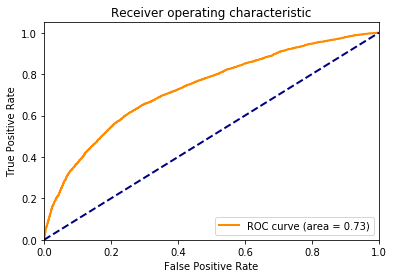

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [45]:
import pandas as pd
import model_lgbm as mlgbm

path_to_train = './data/features/fat_train.csv'
path_to_test = './data/features/fat_test.csv'
path_to_sample = './data/sample_submission_kaggle.csv'
path_to_submission = './data/submission.csv'

train = pd.read_csv(path_to_train, encoding='utf-8')
test = pd.read_csv(path_to_test, encoding='utf-8')

fs, pred, model = mlgbm.create_submission(train, test, path_to_sample, params, cols, path_to_submission, iterations=1000)

In [46]:
mlgbm.feature_score(fs, cols)

[('context_type', 1753),
 ('song_listened', 1679),
 ('context_type_cumulative_mean', 1518),
 ('user_id', 1446),
 ('ts_listen_hour_cumulative_mean', 1427),
 ('platform_name_cumulative_mean', 1325),
 ('ts_listen_dayofweek_cumulative_mean', 1305),
 ('media_duration', 1233),
 ('listen_type_cumulative_mean', 1126),
 ('genre_id_cumulative_mean', 1050),
 ('album_id_cumulative_mean', 812),
 ('artist_id_cumulative_mean', 771),
 ('media_duration_min', 696),
 ('cumsum_is_listened_1', 679),
 ('bpm_min', 673),
 ('gain_min', 659),
 ('gain_std', 653),
 ('media_duration_max', 650),
 ('gain_max', 648),
 ('media_duration_std', 641),
 ('rank_std', 639),
 ('rank_max', 612),
 ('bpm_std', 610),
 ('bpm_max', 594),
 ('gain_mean', 580),
 ('bpm_mean', 580),
 ('media_duration_mean', 566),
 ('rank_min', 541),
 ('rank_mean', 540),
 ('cumsum_is_listened', 524),
 ('cumsum_listen_type_1', 508),
 ('user_age', 494),
 ('release_date_listened_this_year', 454),
 ('was_is_listened_before', 361),
 ('cumsum_listen_type', 262

In [47]:
path_to_submission_correlation = './data/vitalik_submission.csv'
previous_submission = pd.read_csv(path_to_submission_correlation, encoding='utf-8')['is_listened']

from scipy.stats.stats import pearsonr
pearsonr(pred,previous_submission)

(0.59103690153982869, 0.0)